In [4]:
import numpy as np
import pandas as pd
import quandl, math
import datetime

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [5]:
quandl.ApiConfig.api_key = '9Hm18426YvmtuUyyyYCk'
df = quandl.get('WIKI/GOOGL')

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [11]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [12]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/(df['Adj. Low']*100)

In [13]:
df['PCT_CHNG'] = (df['Adj. Close'] - df['Adj. Low'])/(df['Adj. Low']*100)

In [15]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_CHNG', 'Adj. Volume']]

In [16]:
df.head(3)

,Adj. Close,HL_PCT,PCT_CHNG,Adj. Volume
Date,,,,
2004-08-19,50.322842,0.000844,0.000456,44659000.0
2004-08-20,54.322689,0.000854,0.000777,22834300.0
2004-08-23,54.869377,0.000406,0.000032,18256100.0


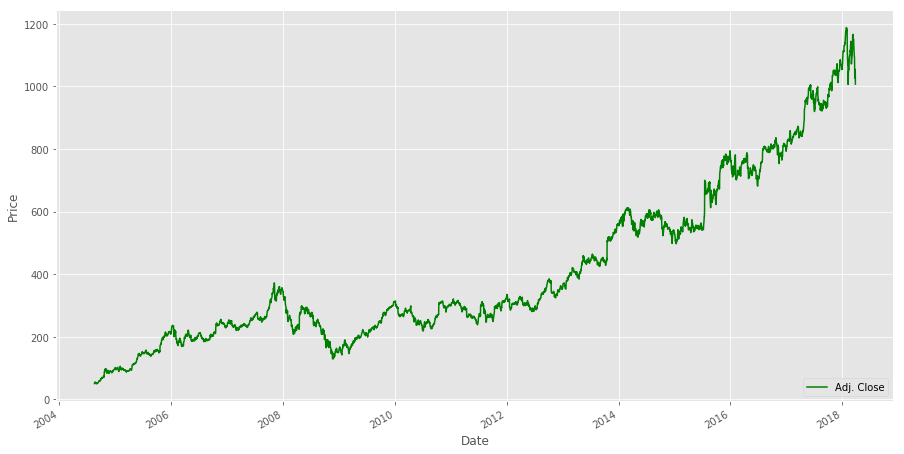

In [18]:
df['Adj. Close'].plot(figsize=(15,8), color='green')
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

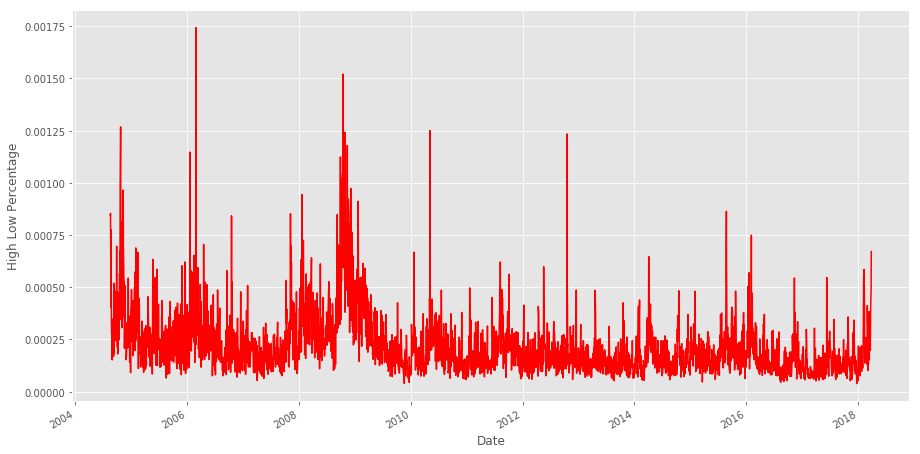

In [19]:
df['HL_PCT'].plot(figsize=(15,8), color='red')
plt.xlabel('Date')
plt.ylabel('High Low Percentage')
plt.show()

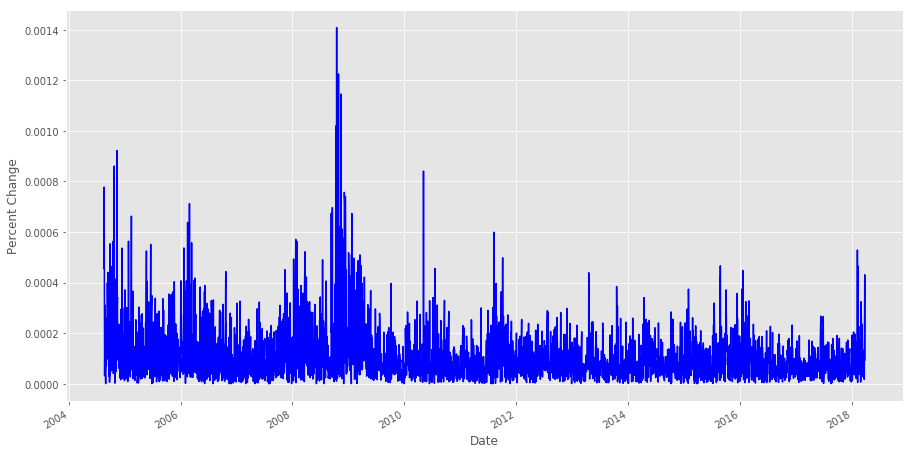

In [20]:
df['PCT_CHNG'].plot(figsize=(15,8), color="blue")
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.show()

In [21]:
forecast_col = 'Adj. Close'

forecast_out = int(60)

print('length = ', len(df), "and forecast_out = ", forecast_out)

length =  3424 and forecast_out =  60


In [22]:
df['label'] = df[forecast_col].shift(-forecast_out)

c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
print(df.tail(2))

            Adj. Close    HL_PCT  PCT_CHNG  Adj. Volume  label
Date                                                          
2018-03-26     1054.09  0.000482  0.000431    3272409.0    NaN
2018-03-27     1006.94  0.000671  0.000093    2940957.0    NaN


In [25]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
print(X[1,:])

[-1.37635178  4.39248725  6.13076288  1.8207495 ]


In [28]:
X_forecast_out = X[-forecast_out:]
X=X[:-forecast_out]
print("length of X_forecast-out:", len(X_forecast_out), "& Length of X:", len(X))

length of X_forecast-out: 60 & Length of X: 3364


In [29]:
y = np.array(df['label'])
y=y[:-forecast_out]
print('Length of y:', len(y))

Length of y: 3364


In [33]:
from sklearn.model_selection import  train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print('length of X_train and X_test:', len(X_train), len(X_test))

length of X_train and X_test: 2691 673


In [36]:
clf = LinearRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Accuracy of Linear regression:', accuracy)

Accuracy of Linear regression: 0.9651929680184502


In [39]:
forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction)

[1097.78825918 1115.24984551 1134.42873581 1141.16058898 1155.55271951
 1160.17710885 1158.5569423  1155.8866561  1157.76653751 1174.63023255
 1176.0042583  1184.61041157 1181.60301002 1189.86356104 1209.34024833
 1223.78816897 1218.31248304 1229.78684017 1234.20532685 1234.67332681
 1225.21765832 1229.75454717 1228.47796455 1163.44664207 1107.50479925
 1120.77796866 1097.11683116 1042.65700798 1078.77005458 1096.76932213
 1097.19276949 1114.20322749 1133.41543751 1139.99261083 1146.90662602
 1157.66161035 1154.62302602 1172.51561826 1189.52773472 1162.02313016
 1148.12637522 1112.31691502 1124.16603009 1136.91967961 1146.06390173
 1158.03340948 1174.87420749 1205.38605946 1212.59810283 1183.5287199
 1195.09710391 1195.56707252 1179.51133344 1142.8280643  1138.98146514
 1137.80817477 1094.23110586 1066.13178593 1090.88891822 1042.57670194]


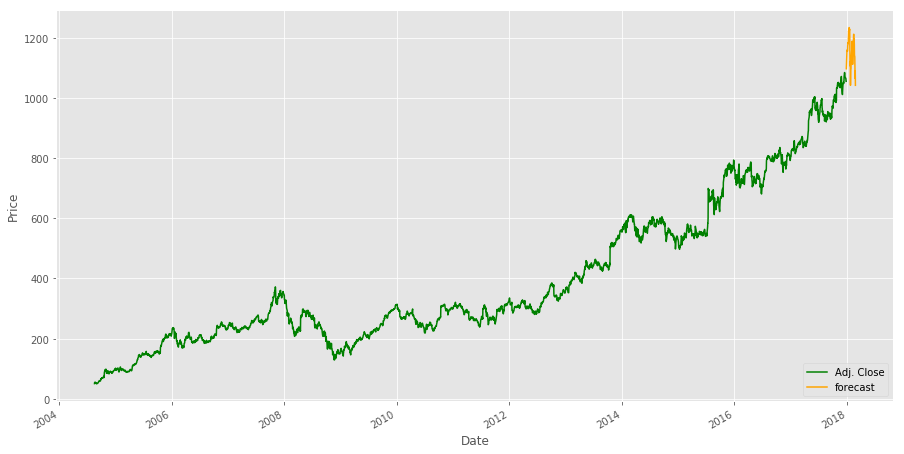

In [40]:
df.dropna(inplace=True)
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot(figsize=(15,8), color='green')
df['forecast'].plot(figsize=(15,8), color='orange')
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


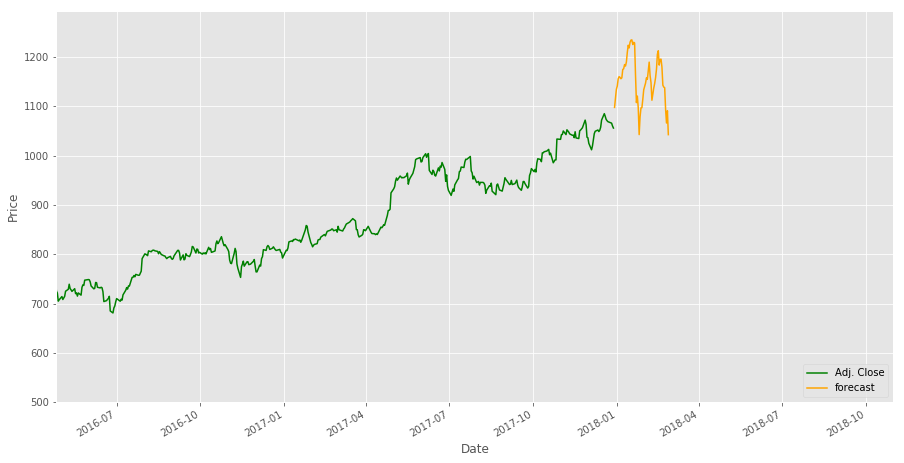

In [44]:
df['Adj. Close'].plot(figsize=(15,8), color='green')
df['forecast'].plot(figsize=(15,8), color='orange')
plt.xlim(xmin=datetime.date(2016,4,26))
plt.ylim(ymin=500)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()